In [1]:
from src.data import DataLoaders
from src import utils
import pathlib
import pandas as pd
from src.models.ModelClasses import FireRiskModels, SmokeAlarmModels
from matplotlib import pyplot as plt
from pathlib import Path
from datetime import date
import numpy as np
#import geopandas as geo
import folium

In [2]:
ACS =  DataLoaders.ACSData(2016,'block_group')

C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:72: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ACS.drop('geoid','columns',inplace =True)


In [3]:
ACS.data.columns

Index(['state', 'tot_population', 'in_poverty', 'inc_pct_poverty',
       'inc_pcincome', 'race_pct_white', 'race_pct_whitenh',
       'race_pct_nonwhite', 'race_pct_nonwhitenh', 'race_pct_black',
       ...
       'house_yr_pct_before_1960', 'house_yr_pct_after_2000',
       'house_yr_pct_1960_2000', 'house_val_less_50K', 'house_val_50_100K',
       'house_val_100K_300K', 'house_val_300K_500K', 'house_val_more_500K',
       'race_pct_black_or_amind', 'pct_alt_heat'],
      dtype='object', length=106)

In [4]:
NFIRS = DataLoaders.NFIRSData('block_group',ACS.tot_pop)
NFIRS_Sev = DataLoaders.NFIRSData('block_group',ACS.tot_pop,sev=True)

C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:200: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  self.Load()


In [5]:
ACS_cols_to_use =[ 'did_not_work_past_12_mo',
               'house_pct_live_alone',
               'pct_alt_heat',
               'house_yr_pct_before_1960',
               'inc_pct_poverty',
               'race_pct_black_or_amind']

In [6]:
FSM =  FireRiskModels('severity')
FPM =  FireRiskModels('propensity')

In [7]:
NFIRS.fires

,2009,2010,2011,2012,2013,2014,2015,2016,2017
geoid,,,,,,,,,
010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282
010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN
010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN
010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148
010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN
...,...,...,...,...,...,...,...,...,...
560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN
560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN
560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619


In [8]:
a = ACS.tot_pop
a[a['tot_population']>=50]

,tot_population
GEOID,
010010201001,745.0
010010201002,1265.0
010010202001,955.0
010010202002,1059.0
010010203001,2364.0
...,...
560459511001,1457.0
560459511002,1582.0
560459513001,1151.0


In [9]:
FPM.train(NFIRS,ACS,ACS_cols_to_use)

C:\Users\cle9a\Documents\rcp2_2_18_2022\src\models\ModelClasses.py:175: RuntimeWarning: All-NaN axis encountered
  mx = np.nanmax(X, axis =1)
C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\numpy\lib\nanfunctions.py:1120: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


217739
216027


C:\Users\cle9a\Documents\rcp2_2_18_2022\src\models\ModelClasses.py:225: RuntimeWarning: All-NaN axis encountered
  mx = np.nanmax(X, axis =1)


217739
217739
Predicting 2017:


C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:48:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Index(['Max', 'Median', 'did_not_work_past_12_mo', 'house_pct_live_alone',
       'pct_alt_heat', 'house_yr_pct_before_1960', 'inc_pct_poverty',
       'race_pct_black_or_amind'],
      dtype='object')
Index(['Max', 'Median', 'did_not_work_past_12_mo', 'house_pct_live_alone',
       'pct_alt_heat', 'house_yr_pct_before_1960', 'inc_pct_poverty',
       'race_pct_black_or_amind'],
      dtype='object')
Feature ranking:
1. Max (0.407792)
2. Median (0.154670)
3. pct_alt_heat (0.083970)
4. house_pct_live_alone (0.075806)
5. inc_pct_poverty (0.071834)
6. race_pct_black_or_amind (0.071424)
7. did_not_work_past_12_mo (0.067820)
8. house_yr_pct_before_1960 (0.066684)


In [10]:
FSM.train(NFIRS_Sev,ACS,ACS_cols_to_use)

217739
216027
217739
217739
Predicting 2017:
[12:48:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Index(['Max', 'Median', 'did_not_work_past_12_mo', 'house_pct_live_alone',
       'pct_alt_heat', 'house_yr_pct_before_1960', 'inc_pct_poverty',
       'race_pct_black_or_amind'],
      dtype='object')
Index(['Max', 'Median', 'did_not_work_past_12_mo', 'house_pct_live_alone',
       'pct_alt_heat', 'house_yr_pct_before_1960', 'inc_pct_poverty',
       'race_pct_black_or_amind'],
      dtype='object')
Feature ranking:
1. Median (0.315771)
2. Max (0.208642)
3. race_pct_black_or_amind (0.088051)
4. house_pct_live_alone (0.082543)
5. did_not_work_past_12_mo (0.077023)
6. inc_pct_poverty (0.076689)
7. house_yr_pct_before_1960 (0.076322)
8. pct_alt_heat (0.074959)


In [11]:
ARC =  DataLoaders.ARCPData()

C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('(', '_')
C:\Users\cle9a\Documents\rcp2_2_18_2022\src\data\DataLoaders.py:30: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(')', '_')


In [12]:
SVI =  DataLoaders.SVIData(ACS.data)
SVI.data

,inc_pct_poverty,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4
geos,,,,,
010010201001,0.191946,0.3913,0.5597,0.3735,0.0993
010010201002,0.044269,0.3913,0.5597,0.3735,0.0993
010010202001,0.382199,0.7065,0.3585,0.5821,0.7299
010010202002,0.111426,0.7065,0.3585,0.5821,0.7299
010010203001,0.042301,0.5659,0.8729,0.6429,0.3882
...,...,...,...,...,...
560459511001,0.094029,0.3925,0.6370,0.2331,0.8555
560459511002,0.062579,0.3925,0.6370,0.2331,0.8555
560459513001,0.261512,0.5093,0.6043,0.2862,0.6949


In [13]:
Smoke = SmokeAlarmModels()

-----Training_Performance------
109.09303707262045
Test RMSE: 10.44476122621386
Test MAE: 7.807108134729946


C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


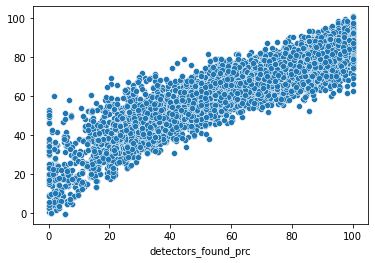

-----Test Performance ----- 
Test RMSE: 13.325554456688877
Test MAE: 9.872345405150694


C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


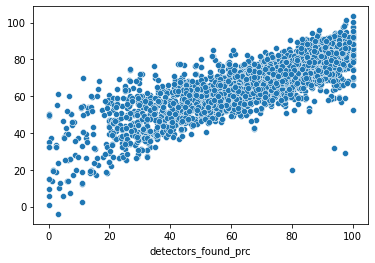

Test Correlation: (0.8142377031701505, 0.0)
Test R-squared: 0.6333513844911638

 Feature ranking:
1. RPL_THEME1 (0.275169)
2. RPL_THEME2 (0.183252)
3. RPL_THEME3 (0.182473)
4. RPL_THEME4 (0.174596)
5. Population Density (per square mile), 2010 (0.144907)
6. inc_pct_poverty (0.039603)


In [14]:
svi_use = True
smoke_prediction = Smoke.trainModels(ARC,ACS,SVI, ACS_cols_to_use,svi_use, utils.DATA['data'])

In [15]:
out = NFIRS.fires.copy()
# add final invidual predictors 

out.columns =  'fires_per_1K_pop_' + out.columns
cols = out.columns

In [16]:
out = ACS.data.merge(out, how = 'left', left_index = True, right_index = True)
out = out[cols]

In [17]:
# Smoke Alarm model munging 


# add number of surveys recorded at the block level
num_surveys_block = Smoke.models['Block_Group']['num_surveys'].copy()
num_surveys_block.index = num_surveys_block.index.str[2:]


out['recorded_home_visits'] = num_surveys_block


# add the statistical model outputs 
Smoke_predicts = Smoke.models['MultiLevel'][
    [ 'detectors_working_prc','detectors_working_CI','geography']].copy()
Smoke_predicts.index = Smoke_predicts.index.str[2:]
out = out.merge(Smoke_predicts,how = 'left', left_index = True, right_index = True)

## add DL model to outputs
DL = pd.DataFrame(smoke_prediction['Population Density (per square mile), 2010'])
DL['detectors_predicted'] = smoke_prediction['Predictions'].copy()

out = out.merge(DL,how = 'left', left_index = True, right_index = True)

In [18]:
out['smoke_detector_risk_frac'] =  1 - out['detectors_predicted'] / 100
out['smoke_detector_risk_score'] =  out['smoke_detector_risk_frac'].rank(pct=True)
out[['smoke_detector_risk_frac','smoke_detector_risk_score']]

,smoke_detector_risk_frac,smoke_detector_risk_score
GEOID,,
010010201001,0.238721,0.329661
010010201002,0.199637,0.212254
010010202001,0.308829,0.556033
010010202002,0.312036,0.566164
010010203001,0.338809,0.646379
...,...,...
560459511001,0.494563,0.925236
560459511002,0.485823,0.918003
560459513001,0.240176,0.334407


In [19]:
out['SVI_Theme_1'] = SVI.data['RPL_THEME1'].replace(-999.0, np.NaN)
out['fire_propensity_risk_score'] = FPM.test_prediction_probs[:,1]
out['fire_severity_risk_score'] = FSM.test_prediction_probs[:,1]



In [20]:
# create and add final predictor 

out['CombinedRiskScore'] =  out.loc[:,['smoke_detector_risk_score',
                                       'SVI_Theme_1',
                                       'fire_propensity_risk_score',
                                       'fire_severity_risk_score'] ].mean(axis = 1,
                                                                          skipna = True) #False )

In [21]:
out['CombinedRiskScore'].describe()

count    217739.000000
mean          0.366766
std           0.210943
min           0.002161
25%           0.206692
50%           0.341107
75%           0.490389
max           0.993983
Name: CombinedRiskScore, dtype: float64

In [22]:
out_name = f"CombinedModels-basic{date.today()}.csv"
out_save = out.copy()
out_save.index = '#_' + out_save.index
out_save.to_csv(utils.DATA['model-outputs'] / out_name)

In [23]:
# alternate risk score ideas 

#out['CombinedRiskScore'] = (out[["fire_severity_risk_score", "fire_propensity_risk_score"]].max(axis=1) + out['smoke_detector_risk_score'])*100

In [24]:
out_columns = ['state','NFIRS_start','NFIRS_end','years_fires_reported','total_fires_reported', 'max_fires_1k', 
               'median_fires_1k','total_fires_reported_sev', 'max_fires_1k_sev', 'median_fires_1k_sev',
               'fire_propensity_risk_score','fire_severity_risk_score','recorded_home_visits',
              'smoke_detector_risk_frac', 'smoke_detector_risk_score','geography', 'SVI_Theme_1','CombinedRiskScore',
              'did_not_work_past_12_mo_sum', 'house_pct_live_alone', 'pct_alt_heat', 'house_yr_pct_before_1960', 
               'inc_pct_poverty', 'race_pct_black_or_amind', 'tot_population', 'house_tot_occ_cnt', 'inc_pcincome', 
               'inc_hhmean', 'race_pct_white', 'race_pct_whitenh','race_pct_whiteh', 'race_pct_nwhitenh', 
               'race_pct_hisp',  'race_pct_black', 'race_pct_amind',  'race_pct_asian', 'race_pct_napi', 'race_pct_other', 
               'race_pct_two+','age_pct_under25', 'age_pct_over65',  'disability_pct', 'snap_past_12_mo', 'single_unit_home', 
               'multi_unit_home', 'mobile_home', 'boat_van_rv_home', 'spanish_speaking']

In [25]:
years = np.append(FSM.train_years.values, FSM.test_year)
years

array(['2012', '2013', '2014', '2015', '2016', '2017'], dtype=object)

In [26]:
out['NFIRS_start'] = min(years)
out['NFIRS_start'] = out['NFIRS_start'].astype(int)
out['NFIRS_end'] = max(years)
out['NFIRS_end'] = out['NFIRS_end'].astype(int)
out

,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,recorded_home_visits,...,"Population Density (per square mile), 2010",detectors_predicted,smoke_detector_risk_frac,smoke_detector_risk_score,SVI_Theme_1,fire_propensity_risk_score,fire_severity_risk_score,CombinedRiskScore,NFIRS_start,NFIRS_end
GEOID,,,,,,,,,,,,,,,,,,,,,
010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282,0,...,504.8,76.127930,0.238721,0.329661,0.3913,0.305585,0.810389,0.459234,2012,2017
010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN,0,...,504.8,80.036270,0.199637,0.212254,0.3913,0.036361,0.053062,0.173244,2012,2017
010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN,0,...,1682.5,69.117142,0.308829,0.556033,0.7065,0.336010,0.904678,0.625805,2012,2017
010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148,0,...,1682.5,68.796364,0.312036,0.566164,0.7065,0.178785,0.003796,0.363811,2012,2017
010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN,0,...,1633.1,66.119095,0.338809,0.646379,0.5659,0.001573,0.002947,0.304200,2012,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN,0,...,1.4,50.543686,0.494563,0.925236,0.3925,0.750244,0.568782,0.659190,2012,2017
560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN,0,...,1.4,51.417744,0.485823,0.918003,0.3925,0.366930,0.002969,0.420100,2012,2017
560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619,3,...,91.0,75.982384,0.240176,0.334407,0.5093,0.185562,0.005528,0.258699,2012,2017


In [27]:
fires_trained = NFIRS.fires_noAdjustment[years]
fires_trained2 = fires_trained>0
fires_trained2['years_fires_reported']= fires_trained2.sum(axis = 1)
fires_trained2 = fires_trained2['years_fires_reported']
out = out.merge(fires_trained2, how = 'left', left_index = True, right_index = True)

fires_trained = NFIRS.fires_noAdjustment[years]
fires_trained['total_fires_reported'] = fires_trained.sum(axis = 1)
fires_trained = fires_trained['total_fires_reported']
out = out.merge(fires_trained, how = 'left', left_index = True, right_index = True)

fires_trained = NFIRS.fires[years]
fires_trained2 = np.nanmax(fires_trained, axis =1)
fires_trained['max_fires_1k'] = fires_trained2
fires_trained2 = fires_trained['max_fires_1k']
out = out.merge(fires_trained2, how = 'left', left_index = True, right_index = True)

fires_trained = NFIRS.fires[years]
fires_trained2 = np.nanmedian(fires_trained, axis =1)
fires_trained['median_fires_1k'] = fires_trained2
fires_trained2 = fires_trained['median_fires_1k']
out = out.merge(fires_trained2, how = 'left', left_index = True, right_index = True)
out

C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: All-NaN axis encountered
  del sys.path[0]
C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\numpy\lib\nanfunctions.py:1120: RuntimeWarning: All-Na

,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,recorded_home_visits,...,SVI_Theme_1,fire_propensity_risk_score,fire_severity_risk_score,CombinedRiskScore,NFIRS_start,NFIRS_end,years_fires_reported,total_fires_reported,max_fires_1k,median_fires_1k
GEOID,,,,,,,,,,,,,,,,,,,,,
010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282,0,...,0.3913,0.305585,0.810389,0.459234,2012,2017,2.0,2.0,1.342282,1.342282
010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN,0,...,0.3913,0.036361,0.053062,0.173244,2012,2017,4.0,6.0,1.581028,1.185771
010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN,0,...,0.7065,0.336010,0.904678,0.625805,2012,2017,4.0,4.0,1.047120,1.047120
010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148,0,...,0.7065,0.178785,0.003796,0.363811,2012,2017,4.0,7.0,3.777148,0.944287
010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN,0,...,0.5659,0.001573,0.002947,0.304200,2012,2017,5.0,8.0,1.269036,0.423012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN,0,...,0.3925,0.750244,0.568782,0.659190,2012,2017,1.0,2.0,1.372684,1.372684
560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN,0,...,0.3925,0.366930,0.002969,0.420100,2012,2017,1.0,1.0,0.632111,0.632111
560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619,3,...,0.5093,0.185562,0.005528,0.258699,2012,2017,3.0,4.0,1.737619,0.868810


In [28]:
fires_trained = NFIRS_Sev.fires[years]
fires_trained['total_fires_reported_sev'] = fires_trained.sum(axis = 1)
fires_trained = fires_trained['total_fires_reported_sev']
out = out.merge(fires_trained, how = 'left', left_index = True, right_index = True)

fires_trained = NFIRS_Sev.fires[years]
fires_trained2 = np.nanmax(fires_trained, axis =1)
fires_trained['max_fires_1k_sev'] = fires_trained2
fires_trained2 = fires_trained['max_fires_1k_sev']
out = out.merge(fires_trained2, how = 'left', left_index = True, right_index = True)

fires_trained = NFIRS_Sev.fires[years]
fires_trained2 = np.nanmedian(fires_trained, axis =1)
fires_trained['median_fires_1k_sev'] = fires_trained2
fires_trained2 = fires_trained['median_fires_1k_sev']
out = out.merge(fires_trained2, how = 'left', left_index = True, right_index = True)
out

C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: All-NaN axis encountered
  import sys
C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\cle9a\anaconda3\envs\rcp2Lite\lib\site-packages\numpy\lib\nanfunctions.py:1120: RuntimeWarning: All-NaN slice

,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,recorded_home_visits,...,CombinedRiskScore,NFIRS_start,NFIRS_end,years_fires_reported,total_fires_reported,max_fires_1k,median_fires_1k,total_fires_reported_sev,max_fires_1k_sev,median_fires_1k_sev
GEOID,,,,,,,,,,,,,,,,,,,,,
010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282,0,...,0.459234,2012,2017,2.0,2.0,1.342282,1.342282,2.684564,1.342282,1.342282
010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN,0,...,0.173244,2012,2017,4.0,6.0,1.581028,1.185771,1.581028,0.790514,0.790514
010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN,0,...,0.625805,2012,2017,4.0,4.0,1.047120,1.047120,1.047120,1.047120,1.047120
010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148,0,...,0.363811,2012,2017,4.0,7.0,3.777148,0.944287,1.888574,1.888574,1.888574
010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN,0,...,0.304200,2012,2017,5.0,8.0,1.269036,0.423012,1.692047,0.423012,0.423012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN,0,...,0.659190,2012,2017,1.0,2.0,1.372684,1.372684,1.372684,1.372684,1.372684
560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN,0,...,0.420100,2012,2017,1.0,1.0,0.632111,0.632111,0.000000,NaN,NaN
560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619,3,...,0.258699,2012,2017,3.0,4.0,1.737619,0.868810,0.000000,NaN,NaN


In [29]:
ACS_toCombine = ACS.data
#check this makes sense
ACS_toCombine['inc_hhmean'] = ACS_toCombine['inc_pcincome']*ACS_toCombine['tot_population']/ACS_toCombine['house_tot_occ_cnt']
ACS_toCombine['inc_hhmean'] = ACS_toCombine['inc_hhmean'].round()
ACS_toCombine['race_pct_whiteh'] = ACS_toCombine['race_pct_white']-ACS_toCombine['race_pct_whitenh']
ACS_toCombine['race_pct_nwhitenh'] = 1-ACS_toCombine['race_pct_hisp']-ACS_toCombine['race_pct_whitenh']
ACS_toCombine['race_pct_nwhitenh'] = ACS_toCombine['race_pct_nwhitenh'].round(5)


ACS_keep = ACS_toCombine[['state',
    'did_not_work_past_12_mo_sum', 'house_pct_live_alone', 'pct_alt_heat', 'house_yr_pct_before_1960', 
    'inc_pct_poverty', 'race_pct_black_or_amind', 'tot_population', 'house_tot_occ_cnt', 'inc_pcincome', 
    'inc_hhmean', 'race_pct_white', 'race_pct_whitenh','race_pct_whiteh', 'race_pct_nwhitenh', 
    'race_pct_hisp',  'race_pct_black', 'race_pct_amind',  'race_pct_asian', 'race_pct_napi', 'race_pct_other', 
    'race_pct_two+','age_pct_under25', 'age_pct_over65',  'disability_pct', 'snap_past_12_mo', 'single_unit_home', 
    'multi_unit_home', 'mobile_home', 'boat_van_rv_home', 'spanish_speaking'
    ]]
ACS_toCombine = ACS_toCombine.replace(-666666666.0, np.nan)
ACS_toCombine

,state,tot_population,in_poverty,inc_pct_poverty,inc_pcincome,race_pct_white,race_pct_whitenh,race_pct_nonwhite,race_pct_nonwhitenh,race_pct_black,...,house_val_100K_300K,house_val_300K_500K,house_val_more_500K,race_pct_black_or_amind,pct_alt_heat,Tract,geos,inc_hhmean,race_pct_whiteh,race_pct_nwhitenh
GEOID,,,,,,,,,,,,,,,,,,,,,
010010201001,AL,745.0,143.0,0.191946,20365.0,0.785235,0.763758,0.214765,0.236242,0.214765,...,0.508772,0.064327,0.000000,0.214765,0.017606,01001020100,010010201001,53422.0,0.021477,0.21477
010010201002,AL,1265.0,56.0,0.044269,33336.0,0.856126,0.826877,0.143874,0.173123,0.082213,...,0.538259,0.174142,0.034301,0.082213,0.032895,01001020100,010010201002,92478.0,0.029249,0.14387
010010202001,AL,955.0,365.0,0.382199,17047.0,0.376042,0.376042,0.623958,0.623958,0.591667,...,0.394737,0.065789,0.030702,0.591667,0.000000,01001020200,010010202001,42176.0,0.000000,0.61042
010010202002,AL,1059.0,118.0,0.111426,21400.0,0.497573,0.488673,0.502427,0.511327,0.461974,...,0.412752,0.020134,0.000000,0.461974,0.019912,01001020200,010010202002,50138.0,0.008900,0.49919
010010203001,AL,2364.0,100.0,0.042301,23106.0,0.626481,0.626481,0.373519,0.373519,0.217851,...,0.592920,0.000000,0.000000,0.227157,0.000000,01001020300,010010203001,66290.0,0.000000,0.27707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,WY,1457.0,137.0,0.094029,33781.0,0.950583,0.929307,0.049417,0.070693,0.000000,...,0.666019,0.091262,0.038835,0.000000,0.366569,56045951100,560459511001,72168.0,0.021277,0.04942
560459511002,WY,1582.0,99.0,0.062579,34002.0,0.935884,0.918642,0.064116,0.081358,0.009698,...,0.525000,0.232812,0.039062,0.014547,0.825737,56045951100,560459511002,72106.0,0.017241,0.06250
560459513001,WY,1151.0,301.0,0.261512,23326.0,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.466851,0.000000,0.000000,0.000000,0.105163,56045951300,560459513001,51335.0,0.000000,0.00000


In [30]:
out = out.merge(ACS_keep, how = 'left', left_index = True, right_index = True)
out

,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,recorded_home_visits,...,race_pct_two+,age_pct_under25,age_pct_over65,disability_pct,snap_past_12_mo,single_unit_home,multi_unit_home,mobile_home,boat_van_rv_home,spanish_speaking
GEOID,,,,,,,,,,,,,,,,,,,,,
010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282,0,...,0.000000,0.363758,0.036242,0.239437,0.183099,0.820423,0.024648,0.154930,0.000000,0.102113
010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN,0,...,0.054545,0.348617,0.114625,0.278509,0.096491,0.925054,0.000000,0.074946,0.000000,0.046053
010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN,0,...,0.018750,0.372917,0.161458,0.458549,0.303109,0.768844,0.201005,0.030151,0.000000,0.000000
010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148,0,...,0.012945,0.303398,0.094660,0.280973,0.172566,0.821138,0.168699,0.010163,0.000000,0.011062
010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN,0,...,0.035956,0.302876,0.134095,0.379854,0.082524,0.995112,0.000000,0.004888,0.000000,0.037621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN,0,...,0.049417,0.234043,0.175704,0.219941,0.054252,0.711035,0.053470,0.228669,0.006826,0.000000
560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN,0,...,0.004849,0.208513,0.215517,0.276139,0.010724,0.706250,0.000000,0.293750,0.000000,0.009383
560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619,3,...,0.000000,0.325804,0.076455,0.210325,0.172084,0.709910,0.054054,0.236036,0.000000,0.000000


In [31]:
out_final = out[out_columns]
out_final

,state,NFIRS_start,NFIRS_end,years_fires_reported,total_fires_reported,max_fires_1k,median_fires_1k,total_fires_reported_sev,max_fires_1k_sev,median_fires_1k_sev,...,race_pct_two+,age_pct_under25,age_pct_over65,disability_pct,snap_past_12_mo,single_unit_home,multi_unit_home,mobile_home,boat_van_rv_home,spanish_speaking
GEOID,,,,,,,,,,,,,,,,,,,,,
010010201001,AL,2012,2017,2.0,2.0,1.342282,1.342282,2.684564,1.342282,1.342282,...,0.000000,0.363758,0.036242,0.239437,0.183099,0.820423,0.024648,0.154930,0.000000,0.102113
010010201002,AL,2012,2017,4.0,6.0,1.581028,1.185771,1.581028,0.790514,0.790514,...,0.054545,0.348617,0.114625,0.278509,0.096491,0.925054,0.000000,0.074946,0.000000,0.046053
010010202001,AL,2012,2017,4.0,4.0,1.047120,1.047120,1.047120,1.047120,1.047120,...,0.018750,0.372917,0.161458,0.458549,0.303109,0.768844,0.201005,0.030151,0.000000,0.000000
010010202002,AL,2012,2017,4.0,7.0,3.777148,0.944287,1.888574,1.888574,1.888574,...,0.012945,0.303398,0.094660,0.280973,0.172566,0.821138,0.168699,0.010163,0.000000,0.011062
010010203001,AL,2012,2017,5.0,8.0,1.269036,0.423012,1.692047,0.423012,0.423012,...,0.035956,0.302876,0.134095,0.379854,0.082524,0.995112,0.000000,0.004888,0.000000,0.037621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,WY,2012,2017,1.0,2.0,1.372684,1.372684,1.372684,1.372684,1.372684,...,0.049417,0.234043,0.175704,0.219941,0.054252,0.711035,0.053470,0.228669,0.006826,0.000000
560459511002,WY,2012,2017,1.0,1.0,0.632111,0.632111,0.000000,NaN,NaN,...,0.004849,0.208513,0.215517,0.276139,0.010724,0.706250,0.000000,0.293750,0.000000,0.009383
560459513001,WY,2012,2017,3.0,4.0,1.737619,0.868810,0.000000,NaN,NaN,...,0.000000,0.325804,0.076455,0.210325,0.172084,0.709910,0.054054,0.236036,0.000000,0.000000


In [32]:
out_name = f"CombinedModels-FileStructureColumns-{date.today()}.csv"
out_final.index = '#_' + out_final.index
out_final.to_csv(utils.DATA['model-outputs'] / out_name)